## Checks for the Chebyshev MPS algorithm

In [1]:
# Parent dir for Jupyter notebooks:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from analysis.functions import distance_norm_1, distance_norm_2, distance_norm_inf
from analysis.methods.chebyshev import mps_chebyshev
from analysis.methods.vector import vector_chebyshev
from analysis.methods.factories import mps_position
from seemps.cross import RegularHalfOpenInterval, RegularClosedInterval

### 0. Check starting MPS error

In [3]:
def check_mps0_error(sites):
    interval = RegularHalfOpenInterval(-1.0, 1.0, 2**sites)
    mps0 = mps_position(interval)
    y1 = interval.to_vector()
    y2 = mps0.to_vector()
    print(y1-y2)

check_mps0_error(6)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 1. Check Chebyshev MPS error 

Here we check the error of the Chebyshev MPS with respect to their analytical expression in terms of:

$$ T_d(x) = \cos(d \cdot \arccos{x}) $$

In [4]:
def plot_chebyshev_MPS_error(sites_list, order_list, norm_type):
    cheb_func = lambda order, x: np.cos(order * np.arccos(x))
    for sites in sites_list:
        errors = []
        name = f"mps_chebyshev-type_open-sites_{sites}"
        interval = RegularHalfOpenInterval(-1.0, 1.0, 2**sites)
        for order in order_list:
            cheb_mps = mps_chebyshev(mps_position(interval), order, name=name)
            cheb_exact = cheb_func(order, interval.to_vector())
            if norm_type == 'L1':
                error = distance_norm_1(cheb_exact, cheb_mps.to_vector())
            elif norm_type == 'L2':
                error = distance_norm_2(cheb_exact, cheb_mps.to_vector())
            elif norm_type == 'Linf':
                error = distance_norm_inf(cheb_exact, cheb_mps.to_vector())
            errors.append(error)
        plt.plot(order_list, errors, '-o', label=f"{sites}")
    plt.yscale("log")
    plt.xticks(range(order_list[-1]))
    plt.xlabel("Order d")
    plt.ylabel(r"Error $T_i(x) - |T_i(x)\rangle$")
    plt.legend(title="Sites n")
    plt.title(f"Distance in norm-{norm_type} of the Chebyshev MPS.")
    plt.show()

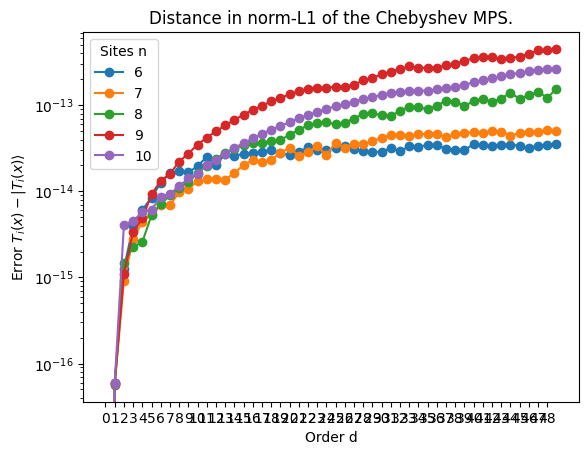

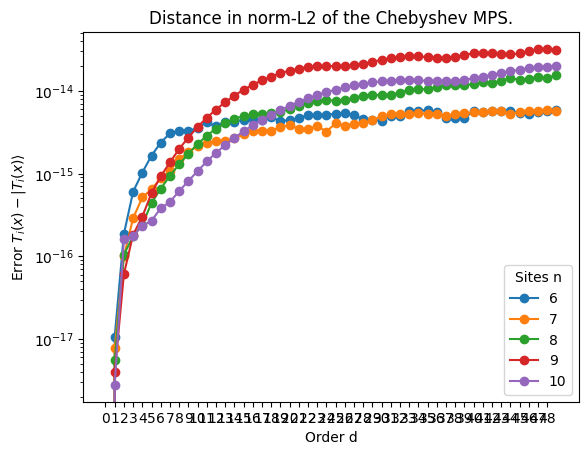

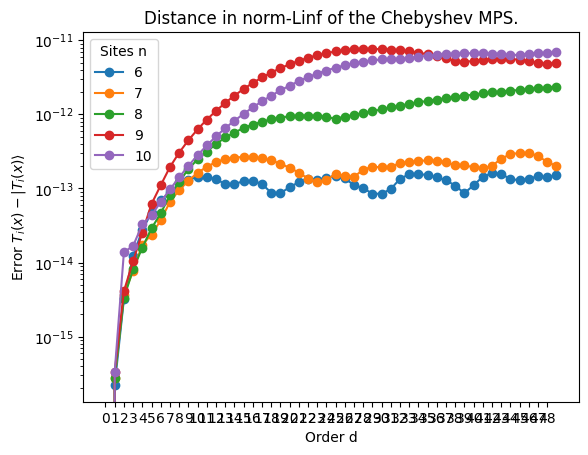

In [5]:
sites_list = [6,7,8,9,10]
order_list = list(range(50))
plot_chebyshev_MPS_error(sites_list, order_list, norm_type='L1')
plot_chebyshev_MPS_error(sites_list, order_list, norm_type='L2')
plot_chebyshev_MPS_error(sites_list, order_list, norm_type='Linf')

### 2. Check the Chebyshev vector error

Do the same but with vectors to check if there is a problem with the recurrence or with the MPS.

In [16]:
def plot_chebyshev_vector_error(sites_list, order_list, norm_type):
    cheb_func = lambda order, x: np.cos(order * np.arccos(x))
    for sites in sites_list:
        errors = []
        name = f"vector_chebyshev-type_open-sites_{sites}"
        interval = RegularHalfOpenInterval(-1.0, 1.0, 2**sites)
        for order in order_list:
            cheb_vector = vector_chebyshev(sites, order, name=name)
            cheb_exact = cheb_func(order, interval.to_vector())
            if norm_type == 'L1':
                error = distance_norm_1(cheb_exact, cheb_vector)
            elif norm_type == 'L2':
                error = distance_norm_2(cheb_exact, cheb_vector)
            elif norm_type == 'Linf':
                error = distance_norm_inf(cheb_exact, cheb_vector)
            errors.append(error)
        plt.plot(order_list, errors, '-o', label=f"{sites}")
    plt.yscale("log")
    plt.xticks(range(order_list[-1]))
    plt.xlabel("Order d")
    plt.ylabel(r"Error $T_i(x) - |T_i(x)\rangle$")
    plt.legend(title="Sites n")
    plt.title(f"Distance in norm-{norm_type} of the Chebyshev MPS.")
    plt.show()

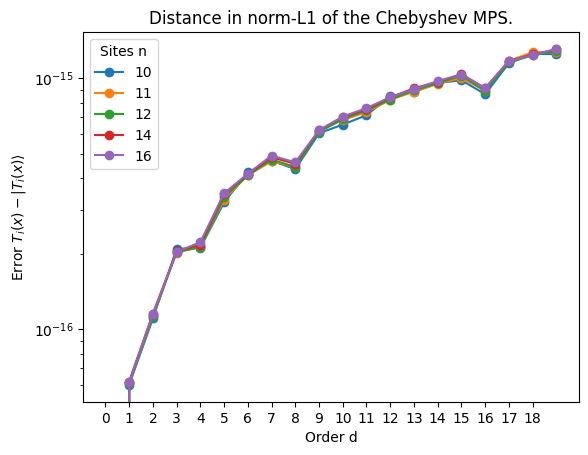

KeyboardInterrupt: 

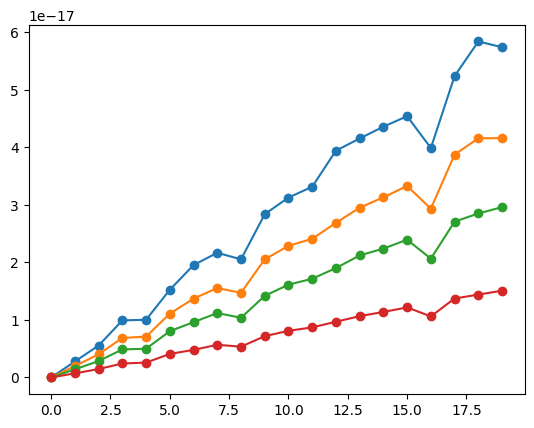

In [17]:
sites_list = [10,11,12,14,16]
order_list = list(range(20))
plot_chebyshev_vector_error(sites_list, order_list, norm_type='L1')
plot_chebyshev_vector_error(sites_list, order_list, norm_type='L2')
plot_chebyshev_vector_error(sites_list, order_list, norm_type='Linf')